In [1]:
# https://edudeveloper.tistory.com/131

import pandas as pd

In [2]:
import psycopg2

class Databases():
    def __init__(self):
        self.db = psycopg2.connect(host='localhost', dbname='mydatabase',user='myuser',password='mypassword',port=5432)
        self.cursor = self.db.cursor()

    def __del__(self):
        self.db.close()
        self.cursor.close()

    def execute(self,query,args={}):
        self.cursor.execute(query,args)
        row = self.cursor.fetchall()
        return row

    def commit(self):
        self.cursor.commit()

In [3]:
class CRUD(Databases):
    def insertDB(self,schema,table,colum,data):
        sql = " INSERT INTO {schema}.{table}({colum}) VALUES ('{data}') ;".format(schema=schema,table=table,colum=colum,data=data)
        try:
            self.cursor.execute(sql)
            self.db.commit()
        except Exception as e :
            print(" insert DB err ",e) 
    
    def readDB(self,schema,table,colum):
        sql = " SELECT {colum} from {schema}.{table}".format(colum=colum,schema=schema,table=table)
        try:
            self.cursor.execute(sql)
            result = self.cursor.fetchall()
        except Exception as e :
            result = (" read DB err",e)
        
        return result

    def updateDB(self,schema,table,colum,value,condition):
        sql = " UPDATE {schema}.{table} SET {colum}='{value}' WHERE {colum}='{condition}' ".format(schema=schema
        , table=table , colum=colum ,value=value,condition=condition )
        try :
            self.cursor.execute(sql)
            self.db.commit()
        except Exception as e :
            print(" update DB err",e)

    def deleteDB(self,schema,table,condition):
        sql = " delete from {schema}.{table} where {condition} ; ".format(schema=schema,table=table,
        condition=condition)
        try :
            self.cursor.execute(sql)
            self.db.commit()
        except Exception as e:
            print( "delete DB err", e)

In [4]:
db = CRUD()

In [5]:
dataset = db.readDB(schema='public', table='savepaint_img_data where processed = false', colum='*')

In [6]:
df = pd.DataFrame(dataset, columns=['id', 'timestamp', 'category', 'label', 'img_height', 'img_width', 'original_fn', 'processed_fn', 'processed'])

In [7]:
df

,id,timestamp,category,label,img_height,img_width,original_fn,processed_fn,processed
0,5,2023-01-14 10:14:51.112199,landmark,operahouse,150,335,operahouse.jpg,None,False
1,6,2023-01-14 10:14:51.117039,landmark,bigben,168,299,bigban.jpg,None,False
2,7,2023-01-14 10:14:51.121601,landmark,eiffel,183,275,eiffel.jpg,None,False


In [8]:
from minio import Minio

In [9]:
client = Minio(
    "localhost:9000",
    access_key="minio", secret_key="miniostorage", secure=False
)

In [10]:
BUCKET_NAME = "savepaint-bucket"

In [11]:
client.list_buckets()

[Bucket('savepaint-bucket')]

In [12]:
import os
import urllib3
from PIL import Image
from io import BytesIO
import requests
import base64

In [13]:
for i in df.iloc:
    ham = client.get_object(bucket_name=BUCKET_NAME, object_name=os.path.join('original', i.category, i.label, i.original_fn))
    king = ham.read()
    img = Image.open(BytesIO(king))
    break

In [17]:
def from_image_to_bytes(img):
    """
    pillow image 객체를 bytes로 변환
    """
    # Pillow 이미지 객체를 Bytes로 변환
    imgByteArr = BytesIO()
    img.save(imgByteArr, format=img.format)
    imgByteArr = imgByteArr.getvalue()
    # Base64로 Bytes를 인코딩
    encoded = base64.b64encode(imgByteArr)
    # Base64로 ascii로 디코딩
    decoded = encoded.decode('ascii')
    return decoded

In [38]:
import PIL

In [39]:
def ham(img: PIL.JpegImagePlugin.JpegImageFile):
    1

In [18]:
img_encoded = from_image_to_bytes(img)

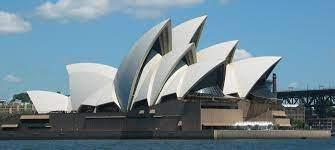

In [19]:
Image.open(BytesIO(base64.b64decode(img_encoded)))

In [48]:
params = {"img_encoded": img_encoded}
response = requests.post(f"http://127.0.0.1:8000", params=params).json()

In [50]:
image = response['image']

In [51]:
myimagedata = base64.b64decode(image)

In [53]:
myimagefile = open("cam.gif", "wb")

In [54]:
myimagefile.write(myimagedata)
myimagefile.close()